# TME5 – The Bloch Sphere

You will implement Bloch-sphere constructions, compute Pauli expectation values and measurement probabilities, implement single-qubit rotations (unitaries) using the course ndlist tools (re-using TME1 helpers), and visualize results with matplotlib

### Note on complex number

Python's built-in complex type is used to represent complex numbers. You can create a complex number using the syntax `a + bj`, where `a` is the real part and `b` is the imaginary part. For example, `3 + 4j` represents the complex number 3 + 4i.

`cmath` is a module that provides mathematical functions for complex numbers. It includes functions like `cmath.exp()`, `cmath.log()`, `cmath.sin()`, and `cmath.cos()`, which operate on complex numbers.

When working with complex numbers, you can use the following functions from the `cmath` module:
- `cmath.phase(z)`: Returns the phase (or angle) of the complex number `z`.
- `abs(z)`: Returns the magnitude (or absolute value) of the complex number `z`.
- `cmath.polar(z)`: Returns the polar coordinates (r, φ) of the complex number `z`, where `r` is the magnitude and `φ` is the phase.
- `cmath.rect(r, φ)`: Converts polar coordinates (r, φ) back to rectangular form (a + bj).
- `cmath.sqrt(z)`: Returns the square root of the complex number `z`.
- `cmath.conj(z)`: Returns the complex conjugate of the complex number `z`.
- `cmath.log(z)`: Returns the natural logarithm of the complex number `z`.
- `cmath.exp(z)`: Returns the exponential of the complex number `z`.

Without `cmath`, writing things like `exp(1j*phi)` would not work, because `math.exp` cannot handle complex inputs. We will not ask you to implement complex number operations from scratch, but you should be comfortable using Python's built-in complex type and the `cmath` module for complex number manipulations.

In [24]:
# Setup
from math import cos, sin, pi, acos
import cmath
from typing import List, Tuple

In [40]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
import numpy as np

In [27]:
# Pauli matrices in numpy
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

I2 = np.eye(2, dtype=complex)

ket_0 = np.array([[1], [0]], dtype=complex)
ket_1 = np.array([[0], [1]], dtype=complex)

In [28]:
# Plot helper (students use but do not edit)
def plot_bloch_sphere(points=None, labels=None):
    fig = plt.figure(figsize=(9,9))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax = fig.add_subplot(111, projection='3d')
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]

    fontsize = 18

    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)

    ax.plot_wireframe(x, y, z, color="lightgray", alpha=0.15)

    ax.quiver(0,0,0,1,0,0,color='r',linewidth=2)
    ax.quiver(0,0,0,0,1,0,color='g',linewidth=2)
    ax.quiver(0,0,0,0,0,1,color='b',linewidth=2)
    ax.text(1.2, 0, 0, 'X', color='r', fontsize=fontsize, alpha=0.6)  # Red for X, bigger font
    ax.text(0, 1.2, 0, 'Y', color='g', fontsize=fontsize, alpha=0.6)  # Green for Y, bigger font
    ax.text(0, 0, 1.2, 'Z', color='b', fontsize=fontsize, alpha=0.6)  # Blue for Z, bigger font

    # Add black orthonormal axes with alpha 0.3
    ax.plot([-1.2, 1.2], [0, 0], [0, 0], color='black', alpha=0.3, linewidth=1)
    ax.plot([0, 0], [-1.2, 1.2], [0, 0], color='black', alpha=0.3, linewidth=1)
    ax.plot([0, 0], [0, 0], [-1.2, 1.2], color='black', alpha=0.3, linewidth=1)


    # Set axis limits to zoom in
    ax.set_xlim([-1.01, 1.01])
    ax.set_ylim([-1.01, 1.01])
    ax.set_zlim([-1.01, 1.01])

    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    if points is not None:
        for i,p in enumerate(points):
            ax.scatter(p[0],p[1],p[2],s=60)
            if labels:
                ax.text(p[0],p[1],p[2], labels[i], fontsize=fontsize)  # Bigger font for point labels

    ax.set_box_aspect([1,1,1])
    ax.set_axis_off()
    plt.show()

## Exercise 1: Spherical Coordinates to Quantum States

We will start by converting spherical coordinates (θ, φ) to quantum states |ψ⟩. The spherical coordinates are defined as:
- θ: polar angle (0 ≤ θ ≤ π)
- φ: azimuthal angle (0 ≤ φ < 2π)

A quantum state |ψ⟩ can be represented as:
$$|ψ⟩ = cos(θ/2)|0⟩ + e^{iφ}sin(θ/2)|1⟩$$

1. Implement a function `spherical_to_state(theta, phi)` that takes angles θ and φ as input and returns the corresponding quantum state |ψ⟩ as a 2D ndlist.
2. Write a function `state_to_bloch_coords(state)` that takes a quantum state |ψ⟩ and returns its coordinates (x, y, z) on the Bloch sphere using the formulas:
$$x = sin(θ)cos(φ) , \quad y = sin(θ)sin(φ) , \quad z = cos(θ)$$

In [29]:
def spherical_to_state(theta: float, phi: float) -> np.ndarray:
    """Convert spherical coordinates (theta, phi) to a quantum state |ψ⟩."""
    ket_psi = cos(theta / 2) * ket_0 + cmath.exp(1j * phi) * sin(theta / 2) * ket_1
    return ket_psi

print(spherical_to_state(pi, 0))

[[6.123234e-17+0.j]
 [1.000000e+00+0.j]]


In [30]:
# Test the function
# Example usage
theta = pi / 2  # 90 degrees
phi = pi / 2    # 90 degrees
state = spherical_to_state(theta, phi)
print("Quantum state |ψ⟩:", state)  # Should be approximately |ψ⟩ = (1/√2)|0⟩ + (i/√2)|1⟩

Quantum state |ψ⟩: [[7.07106781e-01+0.j        ]
 [4.32978028e-17+0.70710678j]]


In [90]:
def state_to_bloch_coords(state: np.ndarray) -> Tuple[float]:
    """Convert a quantum state |ψ⟩ to its Bloch sphere coordinates (x, y, z)."""
    x = state.conj().transpose() @ X @ state 
    y = state.conj().transpose() @ Y @ state 
    z = state.conj().transpose() @ Z @ state 
    return float(np.real(x)), float(np.real(y)), float(np.real(z))

In [91]:
# Test the function
# Example usage
state = np.array([[1/cmath.sqrt(2)], [1j/cmath.sqrt(2)]])  # Example state |ψ⟩ = (|0⟩ + i|1⟩)/√2
coords = state_to_bloch_coords(state)
print("Bloch sphere coordinates (x, y, z):", coords)  # Should be approximately (0, 1, 0)

Bloch sphere coordinates (x, y, z): (0.0, 0.9999999999999998, 0.0)


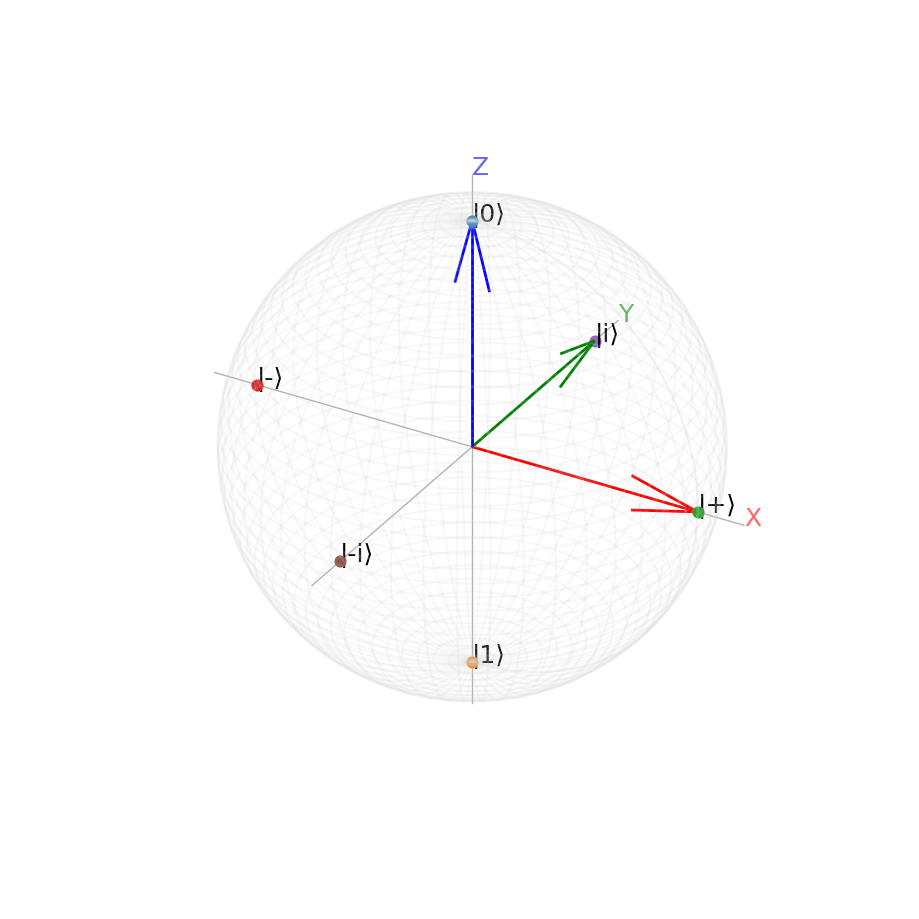

In [92]:
# Visualize some states on the Bloch sphere
states = [
    spherical_to_state(0, 0),               # |0⟩
    spherical_to_state(pi, 0),              # |1⟩
    spherical_to_state(pi/2, 0),            # |+⟩
    spherical_to_state(pi/2, pi),           # |-⟩
    spherical_to_state(pi/2, pi/2),         # |i⟩
    spherical_to_state(pi/2, 3*pi/2)        # |-i⟩
]

coords = [state_to_bloch_coords(s) for s in states]
labels = ['|0⟩', '|1⟩', '|+⟩', '|-⟩', '|i⟩', '|-i⟩']

plot_bloch_sphere(coords, labels)

## Exercise 2 - Rotation Matrices

A rotation in three-dimensional space can be represented by a **3×3 rotation matrix** $R$. Rotations around the principal axes $X$, $Y$, and $Z$ have distinct forms:

### Rotation around X-axis by angle $\theta_x$
$$
R_X(\theta_x) =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\theta_x & -\sin\theta_x \\
0 & \sin\theta_x & \cos\theta_x
\end{bmatrix}
$$
- Rotates points in the **YZ-plane**.
- The X-coordinate remains unchanged.

### Rotation around Y-axis by angle $\theta_y$
$$
R_Y(\theta_y) =
\begin{bmatrix}
\cos\theta_y & 0 & \sin\theta_y \\
0 & 1 & 0 \\
-\sin\theta_y & 0 & \cos\theta_y
\end{bmatrix}
$$
- Rotates points in the **XZ-plane**.
- The Y-coordinate remains unchanged.

### Rotation around Z-axis by angle $\theta_z$
$$
R_Z(\theta_z) =
\begin{bmatrix}
\cos\theta_z & -\sin\theta_z & 0 \\
\sin\theta_z & \cos\theta_z & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
- Rotates points in the **XY-plane**.
- The Z-coordinate remains unchanged.

### Qubit Rotations and Bloch Sphere (Lecture Notes 4.3 Reminder)

On the Bloch sphere, a qubit rotation can be viewed as a 3D rotation of its Bloch vector.

For a normalized axis vector $\vec{v} = (v_x, v_y, v_z)$ and angle $\theta$, the corresponding **unitary operator** is

$$
U_{\vec{v}}(\theta) = \cos\frac{\theta}{2} \, I - i \, \sin\frac{\theta}{2} \, (v_x X + v_y Y + v_z Z)
$$

where $X$, $Y$, $Z$ are the Pauli matrices.

- Rotations around **X**, **Y**, **Z** axes are special cases:
  - $U_X(\theta) = \cos\frac{\theta}{2} I - i \sin\frac{\theta}{2} X$
  - $U_Y(\theta) = \cos\frac{\theta}{2} I - i \sin\frac{\theta}{2} Y$
  - $U_Z(\theta) = \cos\frac{\theta}{2} I - i \sin\frac{\theta}{2} Z$

- Any arbitrary rotation can be expressed as a **composition of rotations around X, Y, Z**:

$$
U(\theta_x, \theta_y, \theta_z) = U_Z(\theta_z) \, U_Y(\theta_y) \, U_X(\theta_x)
$$

> Note: The **order of multiplication matters**. In general, $U_X U_Y \neq U_Y U_X$.
> This is the quantum analogue of the 3D rotation composition on the Bloch sphere (Section 4.3 in the lecture notes).

The Bloch vector of the rotated qubit is obtained by applying this unitary to the state:

$$
|\psi_\text{rot}\rangle = U(\theta_x, \theta_y, \theta_z) \, |\psi\rangle
$$

and then mapping to Cartesian coordinates:

$$
\vec{v}_\text{rot} =
\begin{bmatrix}
\langle \psi_\text{rot} | X | \psi_\text{rot} \rangle \\
\langle \psi_\text{rot} | Y | \psi_\text{rot} \rangle \\
\langle \psi_\text{rot} | Z | \psi_\text{rot} \rangle
\end{bmatrix}
$$



In this exercise, you will explore how **unitary operations act as rotations** on qubits, and how these rotations appear on the Bloch sphere.


- We remind again that any qubit state $|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$ can be represented by a **point on the Bloch sphere**:

$$
\vec{v} =
\begin{bmatrix}
\langle X \rangle \\
\langle Y \rangle \\
\langle Z \rangle
\end{bmatrix}
=
\begin{bmatrix}
\sin\theta \cos\phi \\
\sin\theta \sin\phi \\
\cos\theta
\end{bmatrix}
$$

- Rotations around an axis $\vec{v} = (v_x, v_y, v_z)$ by angle $\theta$ are implemented as:

$$
U_{\vec{v}}(\theta) = \cos\frac{\theta}{2} I - i \sin\frac{\theta}{2} (v_x X + v_y Y + v_z Z)
$$

---

### Task 1: Rotation Operators

1. Implement a function `rotation_operator(v, theta)` that returns the 2×2 unitary for a rotation around axis `v` by angle `theta`.
2. Verify your implementation for **X, Y, Z rotations** using the Pauli matrices.

In [93]:
# Task 1: Rotation operator around an axis
def rotation_operator(v: np.ndarray, theta: float) -> np.ndarray:
    """
    Construct the 2x2 unitary rotation operator for a qubit.

    Args:
        v: normalized axis vector (vx, vy, vz)
        theta: rotation angle in radians
    Returns:
        2x2 complex unitary matrix
    """
    v = v.flatten()
    U = cos(theta/2) * I2 - 1j*sin(theta/2)*(v[0]*X+v[1]*Y+v[2]*Z)
    return U

In [94]:
# Verify with Pauli rotations
U_X_pi = rotation_operator(np.array([[1],[0],[0]]), np.pi)
U_Y_pi = rotation_operator(np.array([[0],[1],[0]]), np.pi)
U_Z_pi = rotation_operator(np.array([[0],[0],[1]]), np.pi)

print("U_X(pi) =\n", U_X_pi)
print("U_Y(pi) =\n", U_Y_pi)
print("U_Z(pi) =\n", U_Z_pi)

U_X(pi) =
 [[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]
U_Y(pi) =
 [[ 6.123234e-17+0.j -1.000000e+00+0.j]
 [ 1.000000e+00+0.j  6.123234e-17+0.j]]
U_Z(pi) =
 [[6.123234e-17-1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17+1.j]]


### Task 2: Rotating a Qubit

1. Write a function `apply_rotation(state, v, theta)` that applies the rotation to a qubit `state` and returns the **new Bloch coordinates**.
2. Compute the new coordinates for the following cases, and plot both original and rotated states on the Bloch sphere:

| Initial State | Rotation Axis | Angle |
|---------------|---------------|-------|
| $|0\rangle$ | X | π |
| $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$ | Y | π |
| $|i\rangle = (|0\rangle + i|1\rangle)/\sqrt{2}$ | Z | π/2 |

In [95]:
def apply_rotation(state: np.ndarray, v: np.ndarray, theta: float) -> np.ndarray:
    """
    Apply a rotation to a qubit state and return the new Bloch coordinates.
    :param state: Initial qubit state |ψ⟩
    :param v: Normalized rotation axis vector (vx, vy, vz)
    :param theta: Rotation angle in radians
    :return: New Bloch coordinates (x, y, z)
    """
    U = rotation_operator(v, theta)
    return U @ state

In [96]:
# Define initial states
states = {
    '|0⟩': spherical_to_state(0, 0),
    '|+⟩': spherical_to_state(pi/2, 0),
    '|i⟩': spherical_to_state(pi/2, pi/2)
}

# Define rotations
rotations = [
    (np.array([[1],[0],[0]]), pi),        # X, π
    (np.array([[0],[1],[0]]), pi),        # Y, π
    (np.array([[0],[0],[1]]), pi/2)       # Z, π/2
]

IndexError: index 2 is out of bounds for axis 0 with size 2

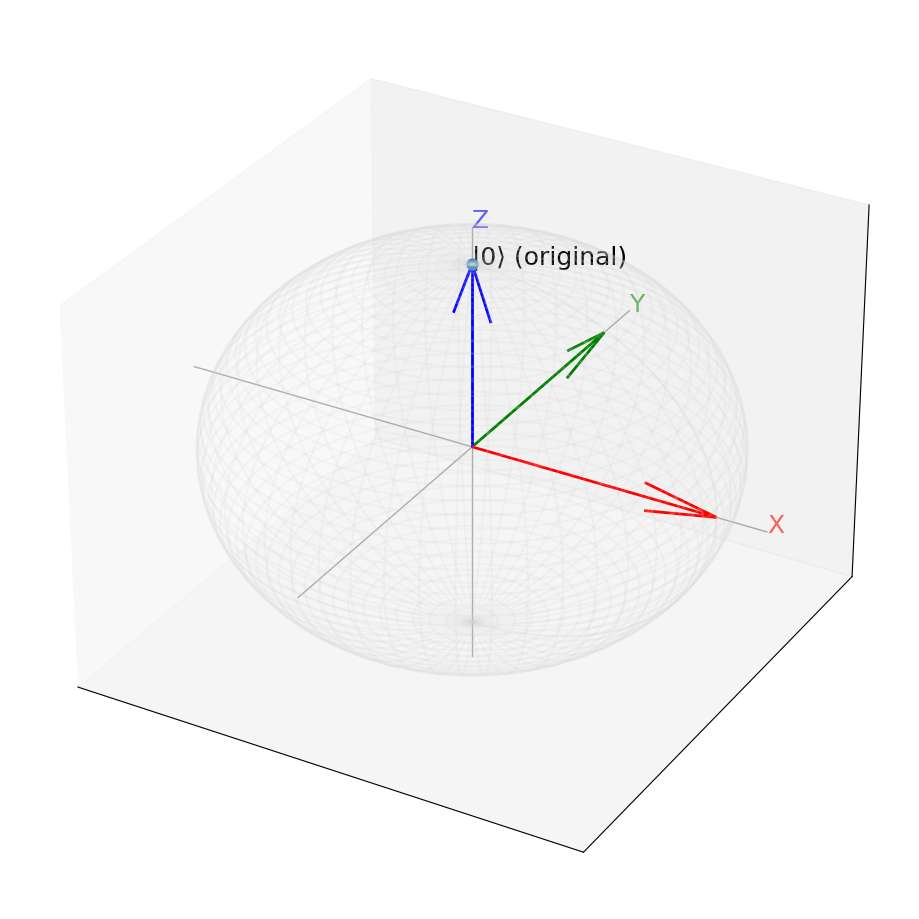

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

# Prepare points for plotting
points = []
labels = []

# Loop over each state and its corresponding rotation
for (state_name, state), (axis, angle) in zip(states.items(), rotations):
    # Compute coordinates
    orig_coords = state_to_bloch_coords(state)
    rot_coords = apply_rotation(state, axis.flatten(), angle)

    # Prepare points and labels
    points = [orig_coords, rot_coords]
    labels = [f"{state_name} (original)", f"{state_name} (rotated)"]

    # Plot Bloch sphere for this pair
    plot_bloch_sphere(points, labels)

---

### Task 4 (Optional, Challenge):

- For a **random axis** $\vec{v}$ and a **random angle** $\theta$:
  1. Apply the rotation to a qubit state.
  2. Visualize the rotation as an **animation** of the Bloch vector moving from the initial to the final position.
- Observe how the axis of rotation and rotation angle affect the trajectory.

---

In [ ]:
# Task 4: Animation of Random Rotations (Optional)
import matplotlib.animation as animation

def animate_rotation(state: np.ndarray, v: np.ndarray, theta: float, steps: int = 100):
    """Animate the rotation of a qubit state on the Bloch sphere."""
    pass

In [ ]:
# Example usage of animation with random axis and angle
import random
# Random axis
random_axis = np.random.rand(3)
random_axis /= np.linalg.norm(random_axis)  # Normalize

# Random angle
random_angle = random.uniform(0, 2 * pi)

# Initial state |+⟩
initial_state = spherical_to_state(pi/2, 0)
# Create animation
ani = animate_rotation(initial_state, random_axis.reshape(3,1), random_angle)


## Exercise 5: Mystery Rotation — Reconstructing the Operation

You have been given two pure qubit states represented by their Bloch sphere coordinates:

- **Initial state:** $\vec{r}_\text{initial} = (x_0, y_0, z_0)$
- **Final state:** $\vec{r}_\text{final} = (x_1, y_1, z_1)$

Both are normalized vectors on the Bloch sphere, corresponding to valid quantum states.

Your task is to **determine the unitary rotation** that transforms the initial state into the final state.

---

### Objective

1. **Find the rotation axis** $\vec{v}$ and **rotation angle** $\theta$ that satisfy:
   $$
   \vec{r}_\text{final} = R_{\vec{v}}(\theta)\, \vec{r}_\text{initial}
   $$
   where $R_{\vec{v}}(\theta)$ is the 3D rotation matrix around axis $\vec{v}$ by angle $\theta$.

2. **Implement in Python:**
   - A function `find_rotation_axis_angle(r_initial, r_final)` that returns `(v, theta)`.
   - Use your result to build the corresponding **unitary matrix**:
     $$
     U_{\vec{v}}(\theta) = \cos\frac{\theta}{2} I - i \sin\frac{\theta}{2} (v_x X + v_y Y + v_z Z)
     $$
   - Verify that $U_{\vec{v}}(\theta)$ indeed maps the initial state $|\psi_0⟩$ to the final state $|\psi_1⟩$ (up to a global phase).

3. **Visualization (optional):**
   - Plot the initial and final Bloch vectors.
   - Draw the rotation axis $\vec{v}$ as an arrow through the sphere.
   - (Bonus) Animate the continuous rotation that connects both.

---

### Example

You can test your implementation with:
```python
r_initial = np.array([0, 0, 1])   # |0⟩
r_final   = np.array([1, 0, 0])   # |+⟩
```
Can you do the same for random initial and final states? Or for other pairs like: |i⟩ to |-i⟩, |+⟩ to |1⟩, etc.?



#### Hints:
- Use `np.real_if_close` to remove small imaginary parts from coordinates.
- Remember that opposite points on the Bloch sphere represent the same qubit state up to a **global phase**.
- Order of multiplication matters if combining multiple rotations.


In [ ]:
import cmath

In [ ]:
def find_rotation_axis_angle(r_initial: np.ndarray, r_final: np.ndarray):
    """
    Given two Bloch vectors r_initial and r_final (normalized),
    compute the rotation axis v and angle theta such that:
        r_final = R_v(theta) * r_initial
    Returns:
        v (3D unit vector), theta (radians)
    """
    pass


In [ ]:
def rotation_operator(v: np.ndarray, theta: float):
    """Return the unitary U_v(theta) corresponding to rotation around v by angle theta."""
    pass

In [ ]:
# --- Example verification ----------------------------------------------------
# Define two Bloch vectors
r_initial = np.array([0, 0, 1])  # |0⟩
r_final   = np.array([1, 0, 0])  # |+⟩

# Find rotation axis and angle
v, theta = find_rotation_axis_angle(r_initial, r_final)
print("Rotation axis v:", v)
print("Rotation angle θ (rad):", theta)
print("Rotation angle θ (deg):", np.degrees(theta))

# Build the unitary rotation operator
U = rotation_operator(v, theta)

# Convert Bloch vectors back to states (for verification)
state_initial = spherical_to_state(0, 0)          # |0⟩
state_rotated = U @ state_initial

# Check Bloch coordinates of the rotated state
coords_rotated = state_to_bloch_coords(state_rotated)
print("\nRotated state Bloch coords:", np.real_if_close(coords_rotated))
print("Expected final Bloch coords:", r_final)

# Verify that it matches the target state up to global phase
phase_diff = cmath.phase(state_rotated[0, 0]) - cmath.phase(spherical_to_state(np.pi/2, 0)[0, 0])
print("\nPhase difference (mod 2π):", phase_diff)

In [ ]:
# Visualization of the rotation axis and states
# ✅ Optional Visualization — Exercise 5: Mystery Rotation

def plot_rotation_axis(r_initial, r_final, v, theta):
    """Visualize the rotation on the Bloch sphere."""
    pass

In [ ]:
# --- Example visualization --------------------------------------------------
plot_rotation_axis(r_initial, r_final, v, theta)